In [7]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
# Load the image in grayscale
img = cv2.imread('/kaggle/input/image1/image.jpg', 0)  # Gray scale image

### Shape Dimensions 

* First element = height (number of rows)
* Second element = width (number of columns)

In [27]:
img.shape

(418, 418)

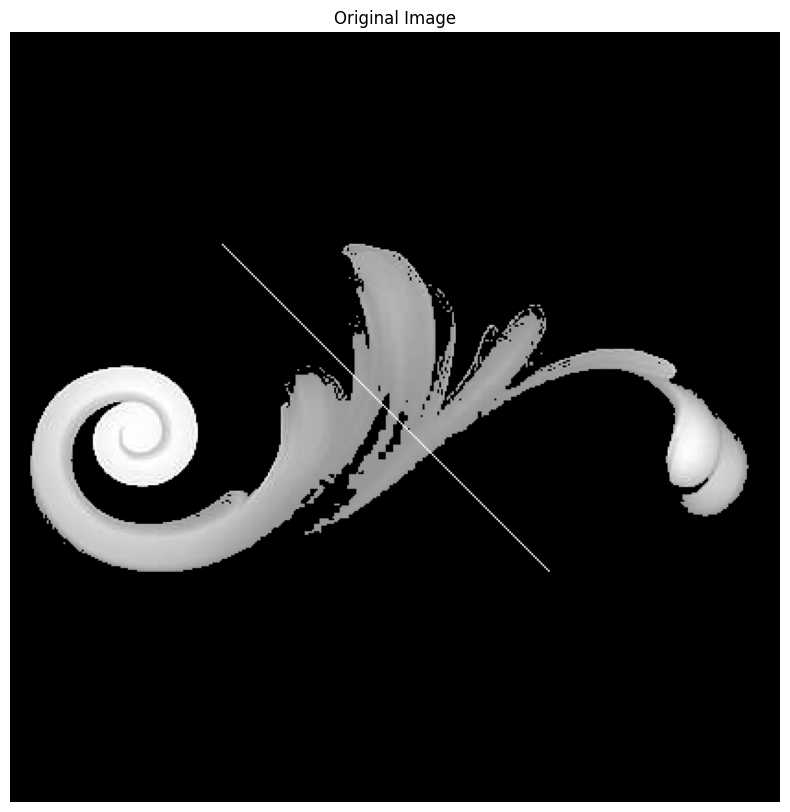

In [45]:
# display the original image

plt.figure(figsize=(10,10))
plt.imshow(img , cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


In [13]:
# create a negative image

negative_image = 255 - img

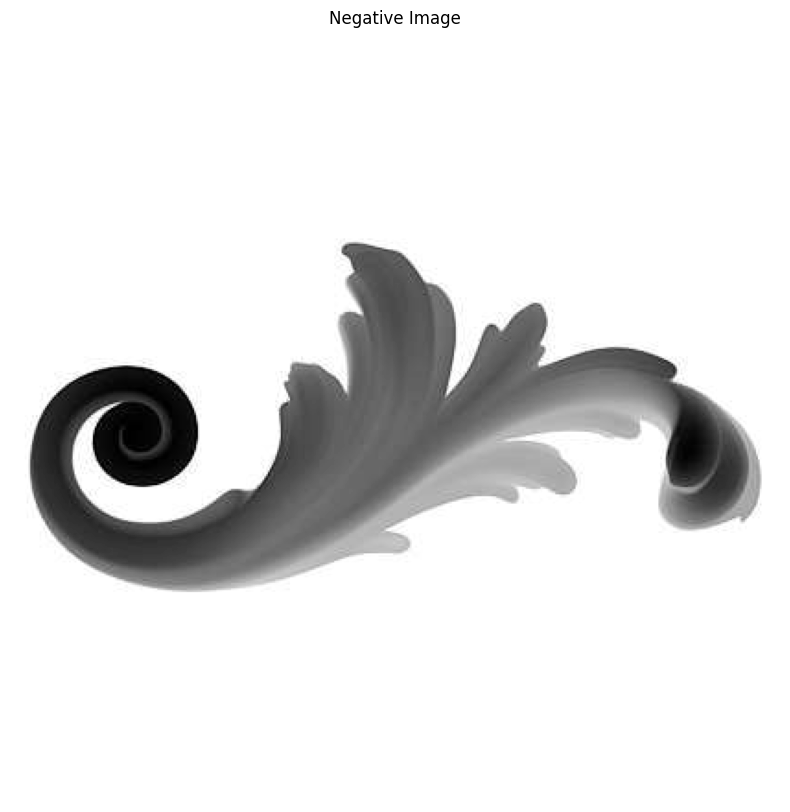

In [44]:
# display the negative image

plt.figure(figsize=(10,10))
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')
plt.show()

In [18]:
# save the negative image 

cv2.imwrite('negative_image.png', negative_image)

True

### Thresholding
#### is a fundamental technique in image processing used to create a binary image from a grayscale image. The basic idea is to convert pixels in the grayscale image into two distinct categories: foreground (typically white) and background (typically black). This is achieved by comparing each pixel's intensity value to a specified threshold.

In [19]:
# applying Threshold 

r=len(img)  # dimension of input image r= number of rows (height)
c= len(img[0]) # c = number of columns 

In [21]:
#These nested loops iterate over each pixel in the image. 

for i in range(0, r-1):   #The outer loop iterates over the rows,
    for j in range(0, c-1): #and the inner loop iterates over the columns.
        
        if img[i][j] > 150: # our chosen threshold value is 150 
            img[i][i] = 255 # pixel value > 150 is set to 255 i.e white
            
        else:
            img[i][j] = 0 # pixel value < 150 is set to 0 i.e black 

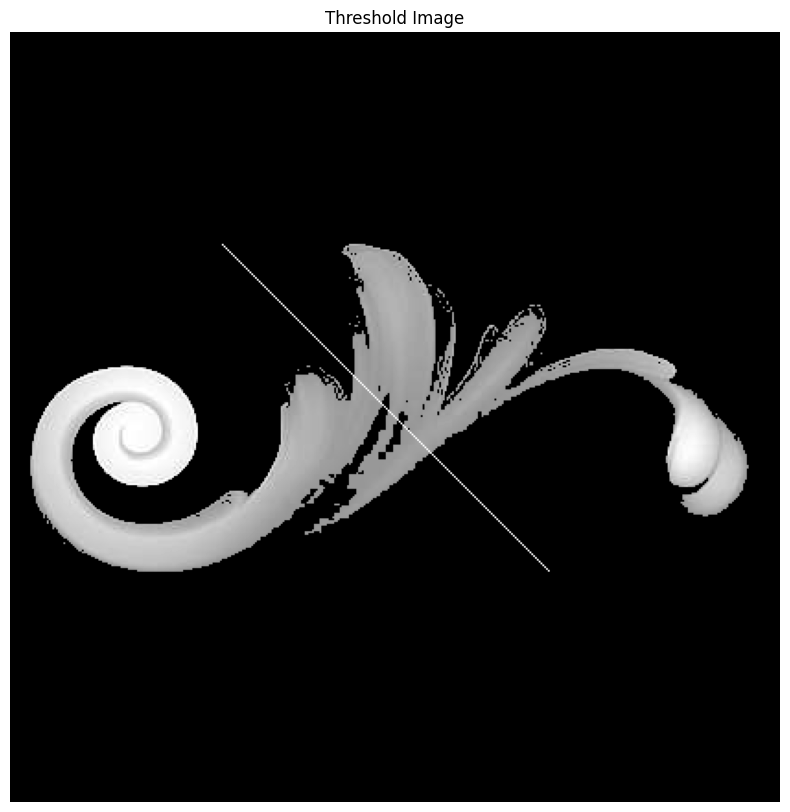

In [23]:
# display the threshold image 

plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.title('Threshold Image')
plt.axis('off')
plt.show()

In [24]:
cv2.imwrite('threshold_image.png', img)

True

In [26]:
cv2.imwrite('/kaggle/working/threshold_image.png', img)

True

### 1. Scaling 
* scale factor > 1 indicates that img will be enlarged by 50% 
* scale factor < 1 would reduce the img size

In [28]:
scale_factor = 1.5 # determines how much the img will be enlarged or reduced in size
width = int(img.shape[1] * scale_factor ) # original width is multiplied with scale factor to get new width of img and is converted into an integer 
height = int(img.shape[0] * scale_factor) # new height integer 
scaled_image = cv2.resize(img, (width, height))

(-0.5, 626.5, 626.5, -0.5)

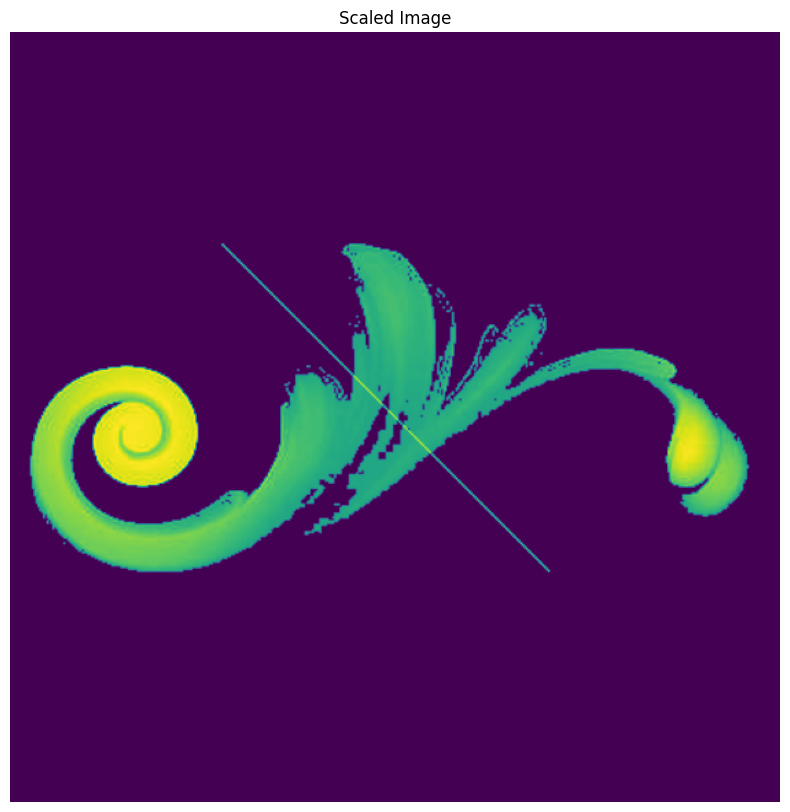

In [41]:
# display the scaled image 
plt.figure(figsize=(10,10))
plt.imshow(scaled_image)
plt.title('Scaled Image')
plt.axis('off')


### 2. Translation 

* Translation is a basic geometric transformation that moves an image in a specified direction along the x and y axes. 
* This transformation is essential in various image processing tasks, including object detection, alignment, and image registration.

### In this matrix:
* The first row [1, 0, tx] indicates that the x-coordinates of the image points will be shifted by tx pixels.
* The second row [0, 1, ty] indicates that the y-coordinates will be shifted by ty pixels.
* The matrix is defined as a float32 type, which is suitable for OpenCV operations.

In [32]:
tx , ty = 50,50 # translation along x and y axes
translation_matrix = np.float32([[1,0, tx],[0,1,ty]]) 
print(translation_matrix)

[[ 1.  0. 50.]
 [ 0.  1. 50.]]


In [34]:
# applying the translation 

translated_image = cv2.warpAffine(img, translation_matrix,
                                 (img.shape[1], img.shape[0]))

* The cv2.warpAffine() function applies the affine transformation defined by the translation_matrix to the original image (img).
* The function takes three arguments:
1. The source image (img).
2. The transformation matrix (translation_matrix).
3. The size of the output image, specified as (img.shape, img.shape), which corresponds to the original width and height of the image.

In [37]:
print(translated_image) , translated_image

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(None,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

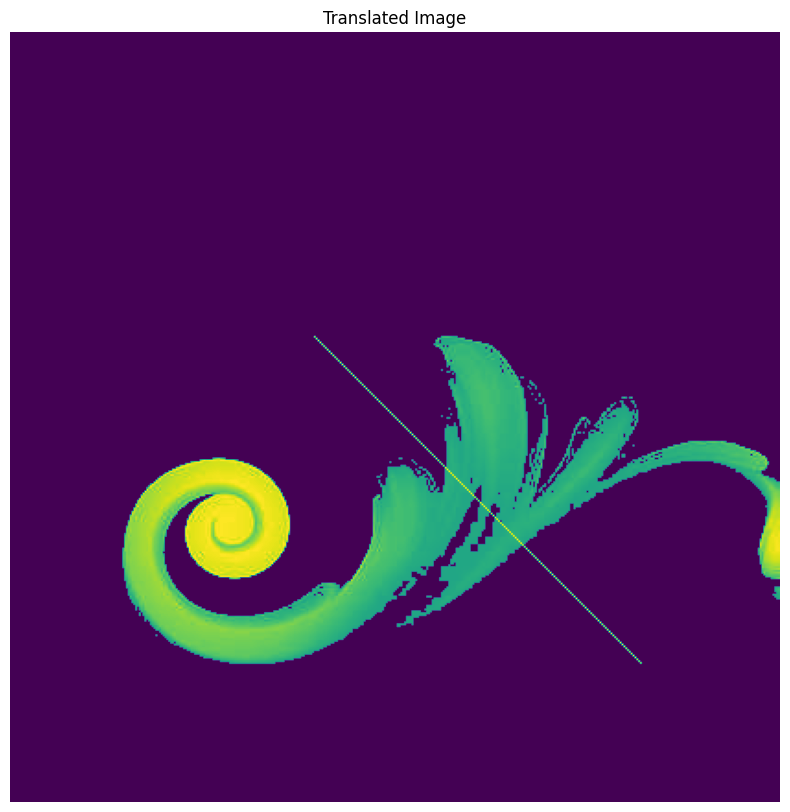

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(translated_image)
plt.title('Translated Image')
plt.axis('off')
plt.show()

### 3. Rotation 

* img.shape gives the width (number of columns) of the image, and * img.shape gives the height (number of rows).
* The // operator is used for integer division, so img.shape // 2 gives the x-coordinate of the center, and img.shape // 2 gives the y-coordinate of the center.
* The resulting center tuple contains the coordinates of the center point of the image.

### The resulting rotation_matrix is a 2x3 matrix that describes how to transform the image based on the specified rotation and scaling.

In [48]:
angle= 45 #  image will be rotated by 45 degrees.

# 2. calculates the center point around which the image will be rotated.
center = (img.shape[1]//2 , img.shape[0]//2) 


# 3. create a rotation matrix 
# getRotationMatrix2D function takes 3 arguements 
# a) center : point around which the img will be rotated 
# b) angle : 45 degrees
# c) 1.0 : img will not be scaled i.e maintain its original size 
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

rotated_img = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))


* This line applies the affine transformation defined by the rotation_matrix to the original image (img) using the cv2.warpAffine() function.
* The function takes three arguments:
1. The source image (img).
2. The transformation matrix (rotation_matrix).
3. The size of the output image, specified as (img.shape, img.shape), which corresponds to the original width and height of the image.

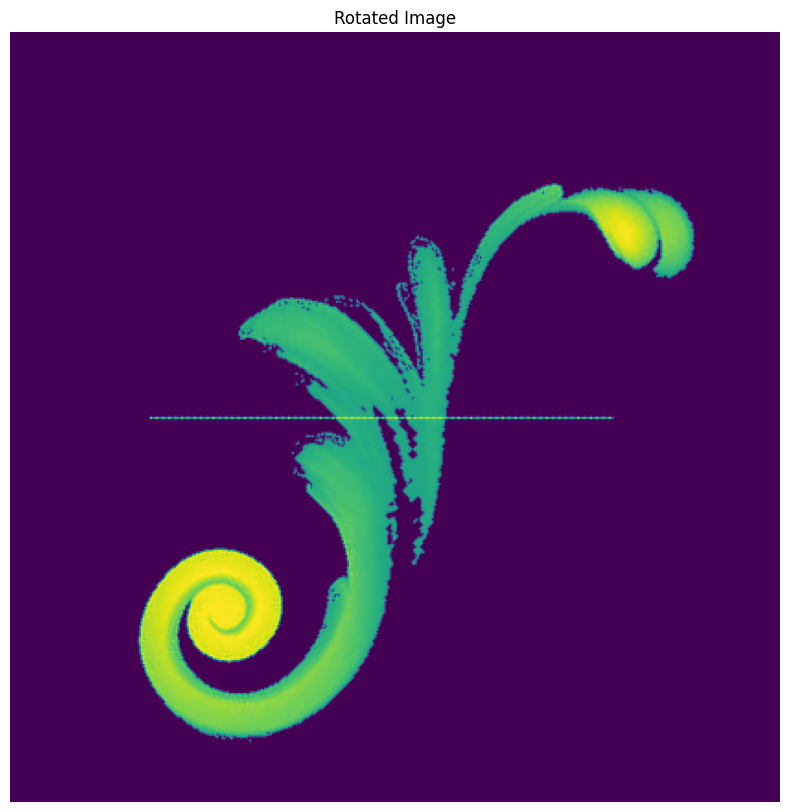

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(rotated_img)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

# Saving All the Images 

In [50]:
cv2.imwrite('/kaggle/working/scaled_image.png' , scaled_image)
cv2.imwrite('/kaggle/working/translated_image.png', translated_image)
cv2.imwrite('/kaggle/working/rotated_image.png', rotated_img)

True